In [1]:
# Importing necessary libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import classification_report
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import export_graphviz, plot_tree
import graphviz

In [2]:
# Now load the encoded dataset.
df1 = pd.read_csv('encoded_retractions35215_V10.csv')
df1.head()

,Journal,ArticleType,CitationCount,SJR Best Quartile,SJR,H index,TimeToRetraction,IsInternationalCollaboration,ArticleAge,IsPaywalled,LevelOfSeriousness,Subject,Institution,Publisher,Country,Author,Cluster
0,4884,56,5,1.0,0.900000,315.000000,280,0,304,0,3.0,0.194505,0.125899,0.028624,0.001657,0.000010,1
1,3474,56,2,3.0,0.290000,23.000000,1089,0,1115,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000009,1
2,3474,56,14,3.0,0.290000,23.000000,1344,0,1367,0,3.0,0.156626,0.062955,0.099475,0.011070,0.000008,1
3,5106,10,0,5.0,1.458473,157.555562,0,0,492,0,1.0,0.232383,0.050368,0.099475,0.064331,0.000009,1
4,964,56,2,1.0,0.764000,48.000000,351,1,520,0,0.0,0.166709,0.035978,0.116854,0.024918,0.000009,4


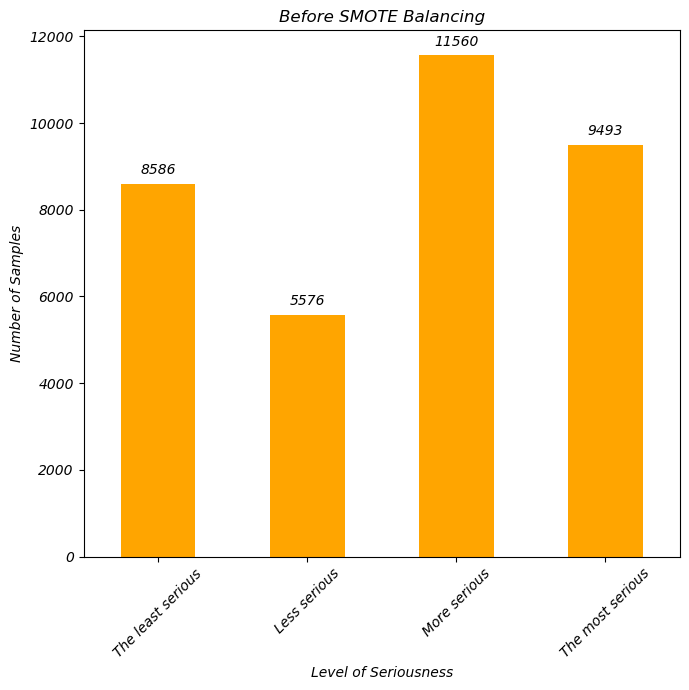

In [3]:
# Check the balance of 4 subsets in the dataset.
label_counts = df1['LevelOfSeriousness'].value_counts().sort_index()  # Ensure the labels are sorted

plt.figure(figsize=(7, 7))
ax = label_counts.plot(kind='bar', color='orange')  # 'ax' captures the plot axes
plt.title('Before SMOTE Balancing')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

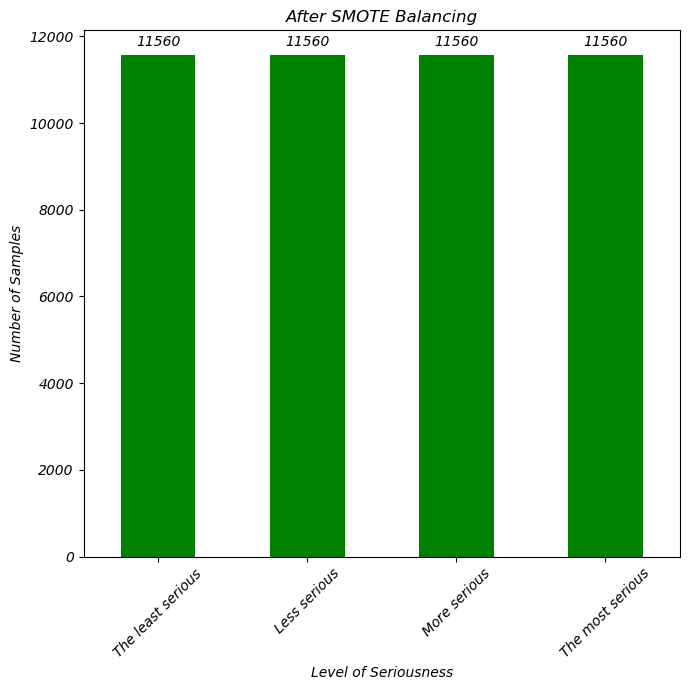

In [4]:
# Separate feataures and the target variable
X = df1.drop('LevelOfSeriousness', axis=1)
y = df1['LevelOfSeriousness']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df = pd.DataFrame(y_resampled, columns=['LevelOfSeriousness'])
label_counts_resampled = y_resampled_df['LevelOfSeriousness'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('After SMOTE Balancing')
plt.xlabel('Level of Seriousness')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(4), labels=['The least serious', 'Less serious', 'More serious', 'The most serious'], rotation=45)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### Build model

In [5]:
# For Random Forest, preprocessing like standardization is not necessary, but let's keep the dataset split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(random_state=0)

# Applying 5-fold cross-validation
cv_results = cross_validate(rfc, X_train, y_train, cv=5,
                            scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

# Training the model on the full training data
rfc.fit(X_train, y_train)

# Predicting on the test set
y_pred = rfc.predict(X_test)

# Evaluation metrics
accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred, average='macro')
recall_RF = recall_score(y_test, y_pred, average='macro')
f1_RF = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy_RF)
print("Precision:", precision_RF)
print("Recall:", recall_RF)
print("F1-Score:", f1_RF)

Accuracy: 0.7839532871972318
Precision: 0.7957376192988681
Recall: 0.7846818959615465
F1-Score: 0.7863915539315635


In [8]:
# Features and target variable
features = ['Journal', 'ArticleType', 'CitationCount', 'SJR Best Quartile', 'SJR', 'H index',
            'TimeToRetraction', 'IsInternationalCollaboration', 'ArticleAge', 'IsPaywalled',
            'Subject', 'Institution', 'Publisher', 'Country', 'Author', 'Cluster']
target = 'LevelOfSeriousness'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(random_state=0)

# Applying 5-fold cross-validation
cv_results = cross_validate(rfc, X_train, y_train, cv=5, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

# Training the model on the full training data
rfc.fit(X_train, y_train)

# Predicting on the test set
y_pred = rfc.predict(X_test)

# Evaluation metrics
accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred, average='macro')
recall_RF = recall_score(y_test, y_pred, average='macro')
f1_RF = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy_RF)
print("Precision:", precision_RF)
print("Recall:", recall_RF)
print("F1-Score:", f1_RF)

Accuracy: 0.7839532871972318
Precision: 0.7957376192988681
Recall: 0.7846818959615465
F1-Score: 0.7863915539315635


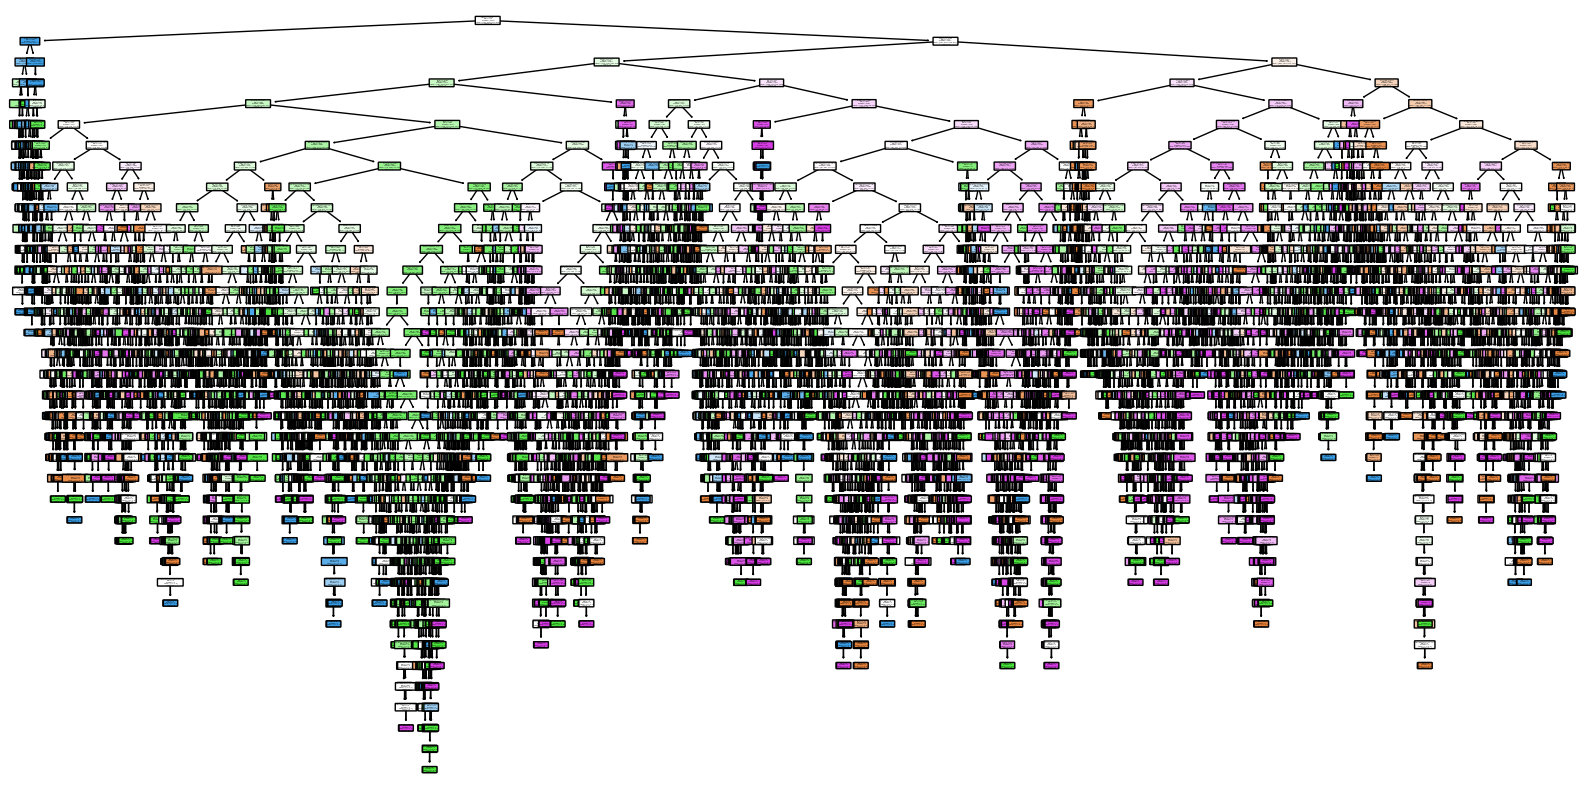

In [10]:
# Visualize the tree using matplotlib
plt.figure(figsize=(20,10))
plot_tree(estimator, 
          feature_names=features, 
          class_names=[str(cls) for cls in rfc.classes_], 
          filled=True, 
          rounded=True)
plt.show()

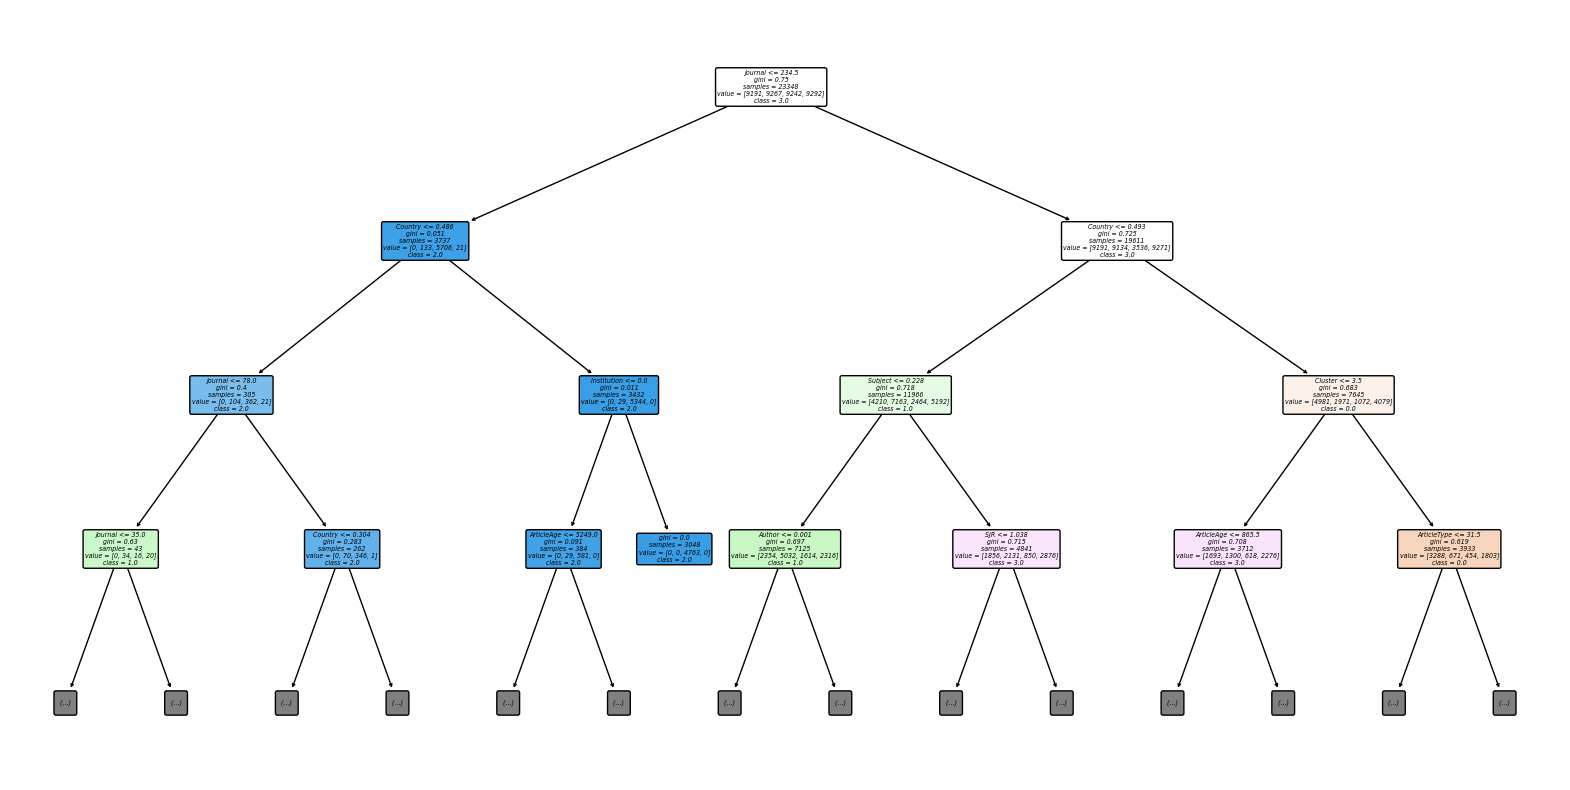

In [12]:
# Visualize the tree with limited depth using matplotlib
plt.figure(figsize=(20,10))
plot_tree(estimator, 
          feature_names=features, 
          class_names=[str(cls) for cls in rfc.classes_], 
          filled=True, 
          rounded=True,
          max_depth=3)  # Limit depth to 3
plt.show()

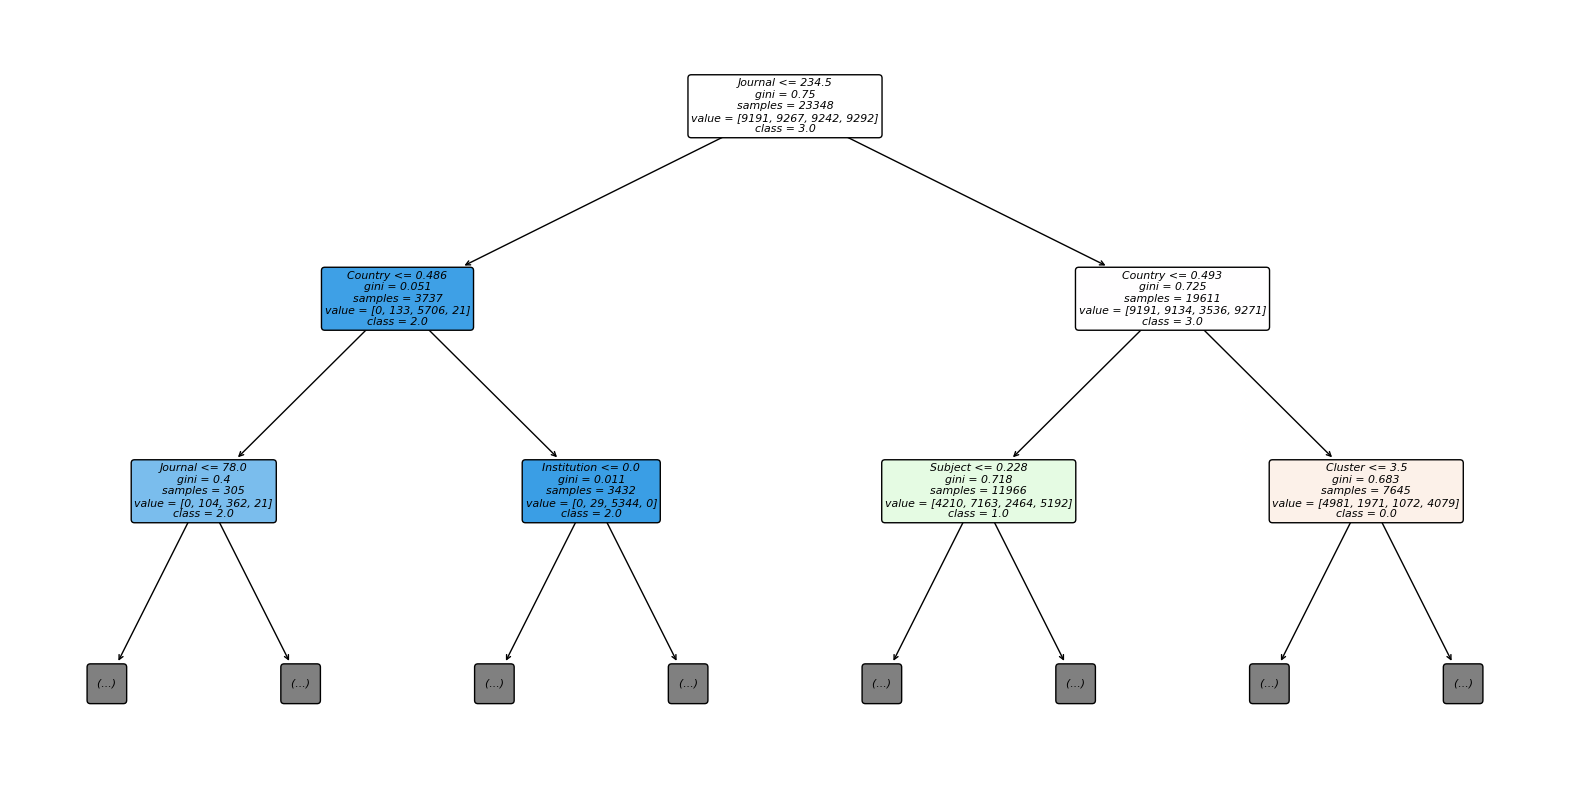

In [15]:
# Visualize a single estimator with limited depth using matplotlib
plt.figure(figsize=(20,10))
plot_tree(estimator, 
          feature_names=features, 
          class_names=[str(cls) for cls in rfc.classes_], 
          filled=True, 
          rounded=True,
          max_depth=2)  # Limit depth to 2
plt.show()